<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Polynomial-regression" data-toc-modified-id="Polynomial-regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Polynomial regression</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-k=1" data-toc-modified-id="Linear-Regression-k=1-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear Regression k=1</a></span></li></ul></li></ul></li><li><span><a href="#Regression-Metrics" data-toc-modified-id="Regression-Metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression Metrics</a></span><ul class="toc-item"><li><span><a href="#Mean-Absolute-Error" data-toc-modified-id="Mean-Absolute-Error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean Absolute Error</a></span></li><li><span><a href="#Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean Squared Error</a></span></li></ul></li><li><span><a href="#Root-Mean-Squared-Error" data-toc-modified-id="Root-Mean-Squared-Error-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Root Mean Squared Error</a></span></li><li><span><a href="#Sckit-Learn-(sklearn)" data-toc-modified-id="Sckit-Learn-(sklearn)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sckit-Learn (sklearn)</a></span><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Measuring-the-error-on-different-models" data-toc-modified-id="Measuring-the-error-on-different-models-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Measuring the error on different models</a></span></li><li><span><a href="#Non-linear-data" data-toc-modified-id="Non-linear-data-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Non linear data</a></span></li></ul></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Preparing-Categorical-data" data-toc-modified-id="Preparing-Categorical-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Preparing Categorical data</a></span><ul class="toc-item"><li><span><a href="#pandas.get_dummies" data-toc-modified-id="pandas.get_dummies-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>pandas.get_dummies</a></span></li><li><span><a href="#sklearn.preprocessing.OneHotEncoder" data-toc-modified-id="sklearn.preprocessing.OneHotEncoder-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>sklearn.preprocessing.OneHotEncoder</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Models</a></span></li><li><span><a href="#Bonus,-trying-out-different-models-at-once" data-toc-modified-id="Bonus,-trying-out-different-models-at-once-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Bonus, trying out different models at once</a></span></li></ul></li></ul></div>

# Intro to ML and Regression

As we've seen, we have **supervised** and **unsupervised** machine learning problems.

We will begin tackling a few **supervised** problems. These are the problems in which there is a target (or label) we want to predict. 

The **target** is a value assigned to each datapoint and we will try to predict (calculate) this value using the other data contained in this point (the multiple columns). These columns are called **features**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Take a look at the following dataset, it is composed by a columns with hours of studying and a column of marks. Each row (data point) represents a student.

In this case, if what we wish to predict is the mark a student will get, this will be our target. And we will be left with a single feature, the hours studied. The problem would be solved similarly with multiple features, as it happens most oftenly.

|Features|Target|
|---|---|
|Hours studied| Mark|

In [2]:
df = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)
df.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


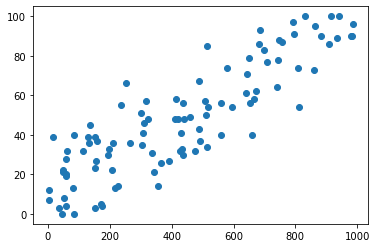

In [3]:
plt.scatter(df["hours"],df["mark"]);

## Regression

We can see by the graph that there is a clear linear tendency in our graph. We will first do a linear regression, than add more complexity to the model by adding diferent polynomial features.

A polynomial of k=0 is a constant value.

k=1 : line

k=2 : parabola

k=3 : cubic curve

etc...

### Polynomial regression

The mathematical definition of a Polynomial Regression tells us that, for a polynomial equation:

$ y = b + a_{1}x + a_{2}x^2 + \cdots + a_{k}x^{k} + e $

Which can be represented as matrix thus:

$Ma=b$

$\begin{bmatrix} \sum_{i=1}^{N} x_i^0 & \sum_{i=1}^{N} x_i & \cdots & \sum_{i=1}^{N} x_i^k \\ \sum_{i=1}^{N} x_i & \sum_{i=1}^{N} x_i^2 & \cdots & \sum_{i=1}^{N} x_i^{k+1} \\ \vdots & \vdots & \vdots & \vdots \\ \sum_{i=1}^{N} x_i^k & \sum_{i=1}^{N} x_i^{k+1} & \cdots & \sum_{i=1}^{N} x_i^{2k} \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_k \\ \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{N} x_i^0y_i \\ \sum_{i=1}^{N} x_i y_i \\ \vdots \\ \sum_{i=1}^{N} x_i^k y_i \\ \end{bmatrix}$

We can solve for the coeficients of the equation using a little linear algebra.

Since modeling a regression problem is trying to fit a curve to a given dataset, by finding the coeficients we will be able to have the formula for our adjusted curve and use it to predict new values.

In [4]:
def row(data,row_number,k):
    return [sum([e**(row_number+i) for e in data])for i in range(k+1)]

def matrix_m(data,k):
    return np.array([row(data, i, k) for i in range(k+1)], dtype='float')

def vector_b(x,y,k):
    return np.array([sum((x**i)*y) for i in range(k+1)], dtype='float')

#### Linear Regression k=1

As said above, if we use k=1 in a polynomial regression, it will result in a linear regression.

In [5]:
M = matrix_m(df["hours"],1)
b = vector_b(df["hours"],df["mark"], 1)

With the above functions we create the matrix M and b for our expression `Ma=b`. Using the Linear Algebra module from numpy, we can solve for `a`, the vector with our coeficients.

In [6]:
coef = np.linalg.solve(M,b)

In [7]:
coef

array([11.78070718,  0.08437787])

There are our coeficients, for $x^0$ and $x^1$, the intercept and the slope of our line.

In [8]:
# Define a lot of values between 0 and 1000 (our range of studied hours) and make them
# equaly spaced. It is how we wil plot the fitted line.
x = np.linspace(0,1000,200)

# We use the coeficients such as in the equation for a line y=mx+b to "predict" the y values.
y = coef[1]*x + coef[0]

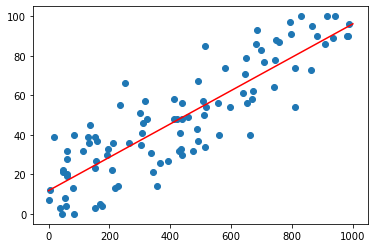

In [9]:
plt.scatter(df["hours"],df["mark"])
plt.plot(x,y, c="r");

In [10]:
# Since it would be a little more complex to do it for polynomials of higher order,
# we can define a function to do our prediction.

def predict(x,coef):
    return sum([(x**i)*coef[i] for i in range(len(coef))])

In [11]:
y_pred = predict(df["hours"],coef)

In [12]:
df["lin_reg"] = y_pred

We can see in contrast, our predictions and the actual value we know from the dataset.  Some of them are very close, but others have a bigger gap. Let's check how to take some metrics and see how our model fares with them.

In [13]:
df

,hours,mark,lin_reg
0,865,95,84.767566
1,4,12,12.118219
2,305,35,37.515958
3,437,56,48.653837
4,682,86,69.326415
...,...,...,...
95,252,66,33.043931
96,49,21,15.915223
97,792,97,78.607981
98,310,46,37.937847


## Regression Metrics
There are many ways to measure the error of an estimator.

### Mean Absolute Error
The absolute error is the simplest, we just calculate the difference between predicted value and **ground truth** (actual value).

We take the absolute of such difference to remove the signs. When we take the mean, positive and negative errors could cancel out and an estimator with lots of errors could result in a MAE very close to zero, giving a wrong interpretation.

In [14]:
df["Absolute Error"] = abs(df["lin_reg"] - df["mark"])
df

,hours,mark,lin_reg,Absolute Error
0,865,95,84.767566,10.232434
1,4,12,12.118219,0.118219
2,305,35,37.515958,2.515958
3,437,56,48.653837,7.346163
4,682,86,69.326415,16.673585
...,...,...,...,...
95,252,66,33.043931,32.956069
96,49,21,15.915223,5.084777
97,792,97,78.607981,18.392019
98,310,46,37.937847,8.062153


In [15]:
mae = df["Absolute Error"].mean()
mae

11.402698299019335

### Mean Squared Error
If we calculate the square of the differences, we will also get rid of the negative values, but we will also have a different error measurement. When we do this, we actually "penalize" more the larger errors, since it will be squared.

The unit of MSE is the unit of the target squared, e.g.: when predicting meters, the mse will be in $m^2$.

In [16]:
df["Squared Error"] = (df["lin_reg"] - df["mark"])**2
df

,hours,mark,lin_reg,Absolute Error,Squared Error
0,865,95,84.767566,10.232434,104.702715
1,4,12,12.118219,0.118219,0.013976
2,305,35,37.515958,2.515958,6.330044
3,437,56,48.653837,7.346163,53.966114
4,682,86,69.326415,16.673585,278.008431
...,...,...,...,...,...
95,252,66,33.043931,32.956069,1086.102506
96,49,21,15.915223,5.084777,25.854959
97,792,97,78.607981,18.392019,338.266364
98,310,46,37.937847,8.062153,64.998308


Plotting a $x^2$ curve (parabola) we can see how larger errors (x axis) would result in a higher Squared Error (y axis), resulting in a larger MSE.

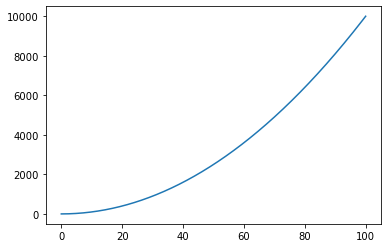

In [17]:
x = np.linspace(0,100,1000)
y = x**2
plt.plot(x,y)

In [18]:
mse = df["Squared Error"].mean()
mse

189.31609105092306

## Root Mean Squared Error

Another very popular measure is the RMSE, which we calculate by taking the square root of the MSE. It is very easy to interpretate, since it has the same unit as the variable being predicted, instead of it's square.

We can look at it as, in average, the distance between the data points and the fitted line, measured in vertical lines.

The RMSE is also called the residuals.

In [19]:
rmse = np.sqrt(mse)
rmse

13.759218402617318

## Sckit-Learn (sklearn)
[Sklearn](https://scikit-learn.org/stable/modules/classes.html) is one of the most popular and usefull python libraries for machine learning. It is a must learn for everyone in data and is a huge tool box for us!


### Metrics
Being the most popular data science library for machine learning, sklearn contains a lot of [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html). You can take a look on the docs linked, but the [**mean_squared_error**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) and it's square root will probably be the one you use the most.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Measuring the error on different models
When we use metrics, we must take into account that they are not absolute values, but a value for comparing different models. And we must use the same metric to compare different models.

Let's fit different order polynomials (k = 1 to 10) to the above data and see what the errors tell us.

In [21]:
# Solve the Linear Algebra system for different order polynomials
coef_k = {}
for i in range(1,11):
    M = matrix_m(df["hours"],i)
    b = vector_b(df["hours"],df["mark"], i)
    coef_k[i] = np.linalg.solve(M,b)

In [22]:
# The dictionary with all the coeficients for each case
coef_k

{1: array([11.78070718,  0.08437787]),
 2: array([1.50331985e+01, 6.20474830e-02, 2.39101989e-05]),
 3: array([ 1.66240350e+01,  4.06647505e-02,  8.02390902e-05, -3.87875097e-08]),
 4: array([ 1.06650148e+01,  1.67092724e-01, -5.08724893e-04,  9.01207980e-07,
        -4.79099517e-10]),
 5: array([ 1.03976665e+01,  1.75478524e-01, -5.70505314e-04,  1.07261564e-06,
        -6.77872784e-10,  8.13889560e-14]),
 6: array([-8.80295341e+04,  3.75064082e+03, -3.87603177e+01,  1.58868520e-01,
        -3.03703422e-04,  2.71624431e-07, -9.18024428e-11]),
 7: array([-9.15508289e+05,  5.21266980e+04, -7.35080057e+02,  4.24155052e+00,
        -1.20330053e-02,  1.77730149e-05, -1.31062046e-08,  3.80975646e-12]),
 8: array([-4.65928029e+06,  3.62589069e+05, -6.78291365e+03,  5.20595418e+01,
        -2.01560251e-01,  4.29455555e-04, -5.10804839e-07,  3.17859416e-10,
        -8.05921919e-14]),
 9: array([-2.06743278e+07,  2.38540654e+06, -5.88574808e+04,  5.85910396e+02,
        -2.97700585e+00,  8.5846

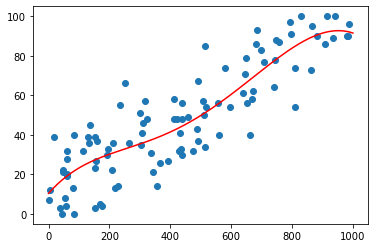

In [23]:
# How a k=5 polynomial fits our data
plt.scatter(df["hours"],df["mark"])
x = np.linspace(0,1000,200)
plt.plot(x,predict(x,coef_k[5]), c="r");

Let's generate a dataframe with the Mean Squared Error for each case.

In [24]:
error = pd.DataFrame(columns=["k","mse"])
for k,coef in coef_k.items():
    mse = mean_squared_error(predict(df["hours"],coef), df["mark"])
    error = error.append({"k":k,"mse":mse}, ignore_index=True)

As we can see, the more complex model will not always give us the better result. And the error grows a lot in higher order polynomials because we add a lot of _variance_ to our model, i.e.: small variations on the features will result in bigger changes on the prediction.

In [25]:
error

,k,mse
0,1.0,1.893161e+02
1,2.0,1.861470e+02
2,3.0,1.856277e+02
3,4.0,1.804344e+02
4,5.0,1.804255e+02
5,6.0,7.620808e+08
6,7.0,6.586083e+17
7,8.0,2.665292e+21
8,9.0,3.505708e+24
9,10.0,1.092342e+27


We can plot the error to see how it changes.

**The plot on the right has the y axis set to log scale for better visualization**

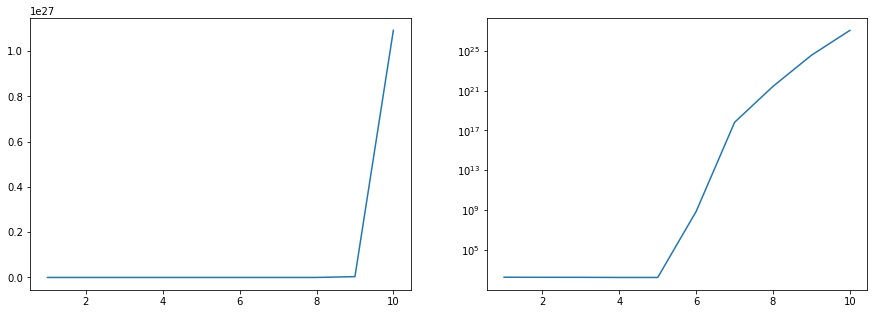

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(error["k"],error["mse"])
plt.subplot(1,2,2)
plt.plot(error["k"],error["mse"])
plt.yscale("log")

#### Non linear data
We have seen that upping the complexity of the model above did no good to our predictions, but we already knew that it was somewhat linearly distributed. We'll try the same with a more complex distribution.

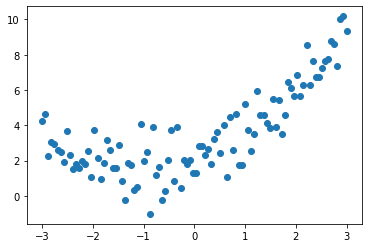

In [35]:
data_x = np.linspace(-3,3,100)
data_y =  .5*data_x**2 + data_x + 2 + np.random.normal(0,1,len(data_x))
plt.scatter(data_x,data_y);

In [36]:
# Solving for coeficients `coef_k`
# We predict for a linear distributed `x` and store it in `y` 
# as to be able to plot all the fitted lines.
y = {}
x = np.linspace(-3,3,200)
coef_k = {}
for i in [1, 2, 25, 300]:
    M = matrix_m(data_x,i)
    b = vector_b(data_x,data_y,i)
    coef_k[i] = np.linalg.solve(M,b)
    y[i] = predict(x,coef_k[i])

Check the plots bellow, we have fitted 4 polynomials with increasing order. We can see that each of the lines has had a different success in fitting the data points.

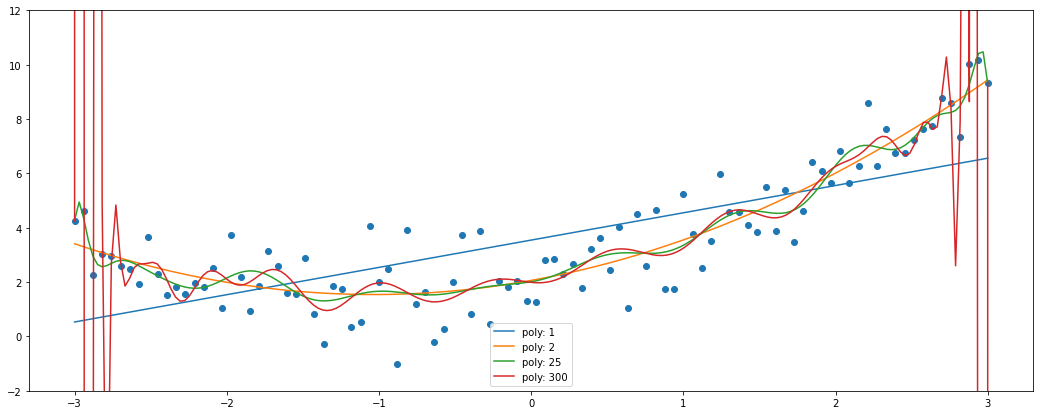

In [40]:
plt.figure(figsize=(18,7))
plt.scatter(data_x,data_y)
for i in y.keys():
    plt.plot(x,y[i], label=f"poly: {i}")
plt.legend()
plt.ylim([-2,12]);

Taking a closer look at the most extreme of the models, we see that it actually does a good job into fitting the data, specially the data points on both extremes.

On the edges of our distribution, the line goes **exactly** through each point, and thus it would have a very little error value.

If we imagine where a different point, between two of them would be , we would probably expect it to be in the same area and as the red line goes of bound, we are to expect a colossal error for such points.

This means that a model that **perfectly** fits our data is probably not what we want. 

It is a phenomenon called **overfitting**, in which our model is so complex as to fit perfectly to our data that the same complexity is responsible to huge errors for points that the model has not previously seen (and trained with).

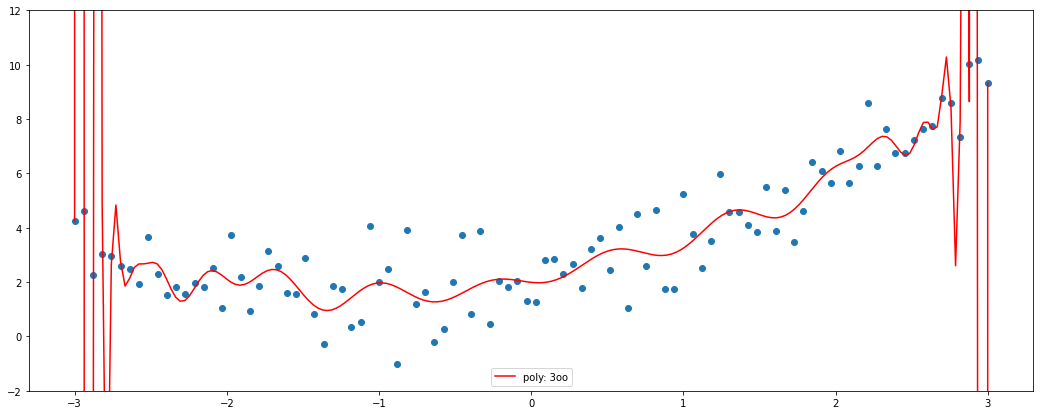

In [39]:
plt.figure(figsize=(18,7))
plt.scatter(data_x,data_y)
plt.plot(x,y[300], label=f"poly: 3oo", c="red")
plt.legend()
plt.ylim([-2,12]);

We can see in the table bellow that the error is the smallest on the most complex model. We can't however verify the "intermediate" points, because we don't have any and have no **ground truth** to compare them to.

In [41]:
error = pd.DataFrame(columns=["k","mse"])
for k,coef in coef_k.items():
    mse = mean_squared_error(predict(data_x,coef), data_y)
    error = error.append({"k":k,"mse":mse}, ignore_index=True)

In [42]:
error

,k,mse
0,1.0,2.804375
1,2.0,1.045585
2,25.0,0.937406
3,300.0,0.873736


### Train Test Split
That is exactly why one of the most important tools in supervised learning is splitting our data into two parts: **Train** and **Test**.

This division must be the same for both features and target, also known as X and y.

The train data is the part we will feed into our model and to which it will be fitted.

The test data is kept a secret from the model, reserved for predicting and calculating the error after the model is trained. This way it acts as `new` or `unknown` data points.

If we were to get a very good error metric for our **train** data, but bad for **test**, it would mean our model works great with the data it uses for training, but nothing else.

Our objective is to minimize the error, but we will never be able to create a really perfect model. 

As statisticians say [all models are wrong, but some are useful](https://en.wikipedia.org/wiki/All_models_are_wrong).


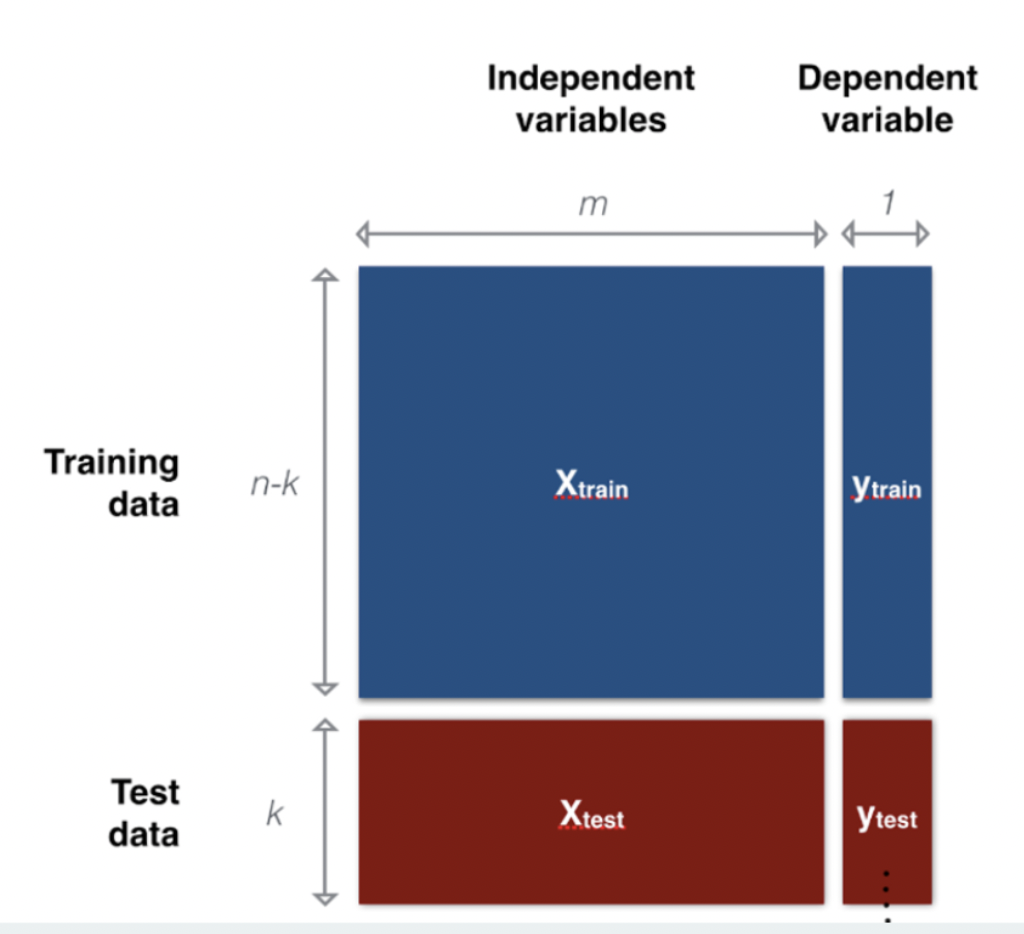

In [43]:
from sklearn.model_selection import train_test_split

When we divide the data into train and test, we must decide how much data we will use for each. There are no absolute rules and depends on each case and the data available, but something around the 20% to 30% for test data is considered normal.

In [56]:
# The division with sklearns already returns the 4 parts for easy unpacking.
# The random_state parameter is used for the repeatability of experiments, since there is some
# randomness involved in the train test splitting.
# Unless explicitly needed, we can not use it.
# Keep in mind that different models should be tested with the same data and division for a more
# just comparison of it's metrics.
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.2, random_state=None)

In [57]:
len(data_x),len(X_train)

(100, 80)

In [58]:
X_train[0]

-1.0606060606060606

We use the **Train** data, the larger part for training (fitting) the model.

In [59]:
y_pred_train = {}
x = np.linspace(-3,3,200)
coef_k = {}
for i in [1, 2, 25, 300]:
    M = matrix_m(X_train,i)
    b = vector_b(X_train,y_train,i)
    coef_k[i] = np.linalg.solve(M,b)
    y_pred_train[i] = predict(x,coef_k[i])

As we can see, the high order polynomial still becomes very fitted to the points on both ends. But we can see with the orange points now that it will probably make a huge error for those.

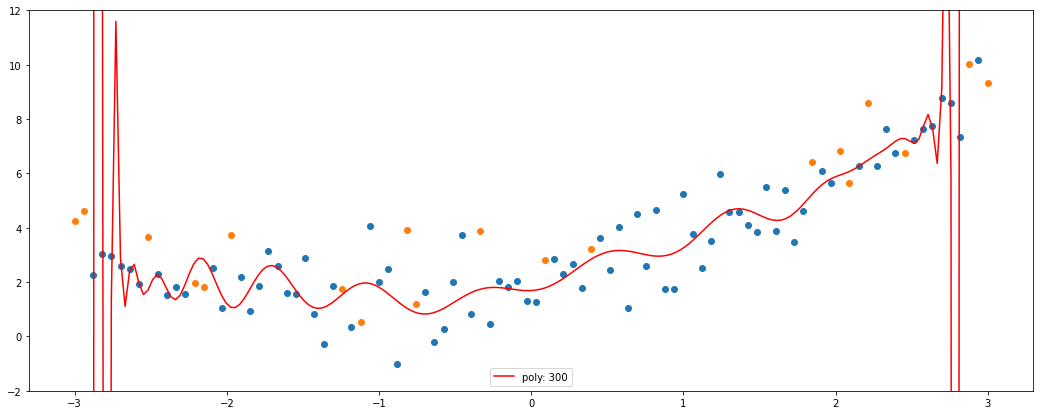

In [60]:
plt.figure(figsize=(18,7))
plt.scatter(X_train,y_train)
plt.plot(x,y_pred_train[300], label=f"poly: 300", c="r")
plt.legend()
plt.ylim([-2,12])

plt.scatter(X_test,y_test);

For a proper evaluation, let's calculate the error for both `Train` and `Test`

In [61]:
error = pd.DataFrame()
for k,coef in coef_k.items():
    mse_train = mean_squared_error(predict(X_train,coef), y_train)
    mse_test = mean_squared_error(predict(X_test,coef), y_test)
    error = error.append({"k":k,"mse_train":mse_train, "mse_test":mse_test}, ignore_index=True)

In [62]:
error

,k,mse_test,mse_train
0,1.0,4.876715e+00,2.382859
1,2.0,1.569740e+00,0.953567
2,25.0,6.547377e+02,0.831290
3,300.0,9.780038e+17,0.772399


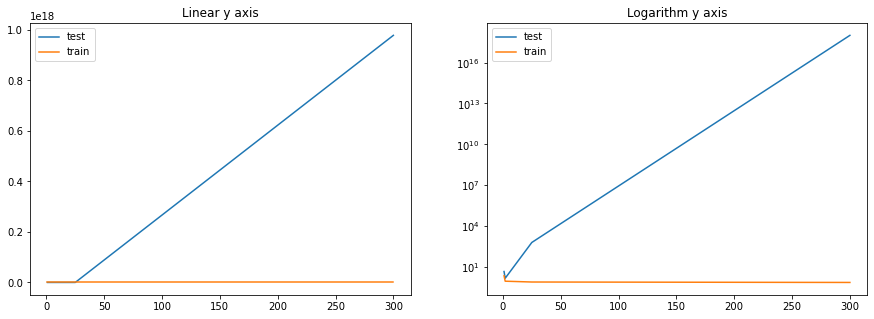

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(error["k"],error["mse_test"], label="test")
plt.plot(error["k"],error["mse_train"], label="train")
plt.title("Linear y axis")
plt.legend()
plt.subplot(1,2,2)
plt.plot(error["k"],error["mse_test"], label="test")
plt.plot(error["k"],error["mse_train"], label="train")
plt.yscale("log")
plt.title("Logarithm y axis")
plt.legend()

With knowledge of both errors, we can see if our model is truly good or just with the data it "knew". We don't want huge differences between those values, because that is what indicates the overfitting.

|Error Train|Error Test| Result|
|---|---|---|
|Good|Bad| Overfit|
|Bad|Bad| Undefit|
|Good|Good| Good fit|

### Preparing Categorical data

In our modeling, we will be dealing with a lot of data and of different types. When our data is categorical, we cannot just feed it into our computers, since machines don't deal with that so well. 

It is necesarily to first prepare this data in order to make it machine readable.

Even though we could simply change each value to 1, 2, 3, 4, etc. that would be giving some extra (undesired) information to our model. So, in order to avoid it, we use a process called One Hot Encoding.

To do this, all the possible values on a given categorical column will be turned into columns and for each row a 1 will be assigned to tha column corresponding to that value, the remainder being set to zero.

In [69]:
# One Hot Encoding
df = pd.DataFrame([np.random.choice(["Cat", "Dog", "Turtle"]) for _ in range(50)], columns=["animal"])
df["weight"] = np.random.randint(0,100,50)

In [70]:
df.head()

,animal,weight
0,Cat,87
1,Turtle,66
2,Cat,59
3,Dog,5
4,Cat,68


#### pandas.get_dummies
As we can see, on the previous dataframe, the `animal` column contains categorical data. One easy way of one-hot-encoding is using pandas own function for that. Is as easy as passing the dataframe and it will figure out the categorical ones.

In [71]:
pd.get_dummies(df).head()

,weight,animal_Cat,animal_Dog,animal_Turtle
0,87,1,0,0
1,66,0,0,1
2,59,1,0,0
3,5,0,1,0
4,68,1,0,0


#### sklearn.preprocessing.OneHotEncoder
Alternatively, we can use the sklearn variation, since sometimes our data will not be in pandas format, such as being a numpy array, for example.

In [77]:
animals = np.array(df["animal"])
animals

array(['Cat', 'Turtle', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat',
       'Turtle', 'Dog', 'Turtle', 'Cat', 'Cat', 'Cat', 'Turtle', 'Cat',
       'Dog', 'Turtle', 'Dog', 'Cat', 'Turtle', 'Turtle', 'Cat', 'Turtle',
       'Dog', 'Turtle', 'Dog', 'Turtle', 'Cat', 'Turtle', 'Cat', 'Turtle',
       'Dog', 'Dog', 'Turtle', 'Dog', 'Turtle', 'Dog', 'Cat', 'Turtle',
       'Dog', 'Turtle', 'Dog', 'Turtle', 'Cat', 'Cat', 'Turtle', 'Cat',
       'Turtle'], dtype=object)

In [82]:
from sklearn.preprocessing import OneHotEncoder

# It works the same as models, but with `transform` instead of `predict`.

ohe = OneHotEncoder()

# fit data
ohe.fit(animals.reshape(-1, 1))

# Then transform
animals_ohe = ohe.transform(animals.reshape(-1, 1))
animals_ohe.todense()[:5]

matrix([[1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [85]:
# The labels are stored as
ohe.categories_

[array(['Cat', 'Dog', 'Turtle'], dtype=object)]

In [92]:
# And the reverse can be also done
ohe.inverse_transform(np.array([[0,1,0]]))

array([['Dog']], dtype=object)

### Models
Of course, the part that interests us the most are the models sklearn has prepared for us to use. 

We'll use a couple of them below, but the process is the same for all. ;)

Therefore it is very easy to try out different models just by changing the model class.

You can see a full list of [sklearn supervised learning models.](https://scikit-learn.org/stable/supervised_learning.html)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
# Remember that our data is separated into
# X_train, X_test, y_train, y_test

# We begin by creating the model object.
# You can set some parameters on this step
lr = LinearRegression(fit_intercept=True)

# For training, we just have to call the .fit() method
# passing both the X_train and y_train data
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [95]:
# If you wish to see the coeficients, such as on a LinearRegression
# you can find them on these two attributes.
# The intercept is kept separate
lr.coef_, lr.intercept_

(array([1.01863168]), 3.2680552079833047)

In [96]:
# For making some predictions, we just have to call the predict model
# and pass it the X values for which we want to predict, on this case, the X_test
y_pred = lr.predict(X_test.reshape(-1, 1))

In [97]:
# And let's see how our model does
mean_squared_error(y_pred,y_test)

4.876715489372038

Since all models follow the same structure, with `.fit` and `.predict`, it is very easy to try different models to see how they do. 

Next, we do a Support Vector Regressor

In [99]:
from sklearn.svm import SVR

In [100]:
# Create model object
svr = SVR()
# Train
svr.fit(X_test.reshape(-1, 1),y_test)

SVR()

In [101]:
# Predict
y_pred = svr.predict(X_test.reshape(-1, 1))

In [102]:
# Metric
mean_squared_error(y_pred,y_test)

1.5783250334463783

### Bonus, trying out different models at once

In [103]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
# Since the models are python objects, we can store them on a dictionary
models = {
    "ridge":Ridge(),
    "lasso":Lasso(),
    "sgd":SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "gradient":GradientBoostingRegressor()
}

In [108]:
# They also have the same methods, so we can iterate to train
for m in models.values():
    m.fit(X_train.reshape(-1,1),y_train)

In [110]:
y_pred = {}
# They also have the same methods, so we can iterate to predict
for name,m in models.items():
    y_pred[name] = m.predict(X_test.reshape(-1,1))

In [113]:
# Calculating MSE
mse = {}
for name,y in y_pred.items():
    mse[name] = mean_squared_error(y,y_test)

In [114]:
mse

{'ridge': 4.8744892938110596,
 'lasso': 5.216003636637381,
 'sgd': 5.008756951531887,
 'knn': 2.05965963747743,
 'gradient': 2.6604149091020317}

And thus we can check which is the best model among our options.

We will soon see how to tune the parameters of the models to get better results! 🚀